# 신경망 기초 

In [25]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

0번째 영화 리뷰 디코딩 

In [48]:
word_index = imdb.get_word_index() # 사전 
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = [reversed_word_index.get(i-3, '?') for i in train_data[0]]

In [51]:
for i in decoded_review : 
    print(i, end=' ')
print()

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# 데이터 전처리 - 원핫인코딩 벡터 꼴로 모두 변환 

In [61]:
# 원핫인코딩 행렬 구한다. 
import numpy as np

def vectorize_sequence(sequence, dimension=10000) : 
    zero_matrix = np.zeros((len(sequence), dimension)) # (25000, 10000) 영행렬 
    for i, sq in enumerate(sequence) : 
        zero_matrix[i, sq] = 1. # 영벡터에서 sq 위치 전부 1로 바꾼다. -> 원핫 인코딩 벡터 25000개로 구성된 행렬이 된다. 
    return zero_matrix 
x_train = vectorize_sequence(train_data); x_test = vectorize_sequence(test_data) # 변환된 원핫 인코딩 '행렬' 2개. 

In [68]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32') # 정답값도 전부 ndarray 꼴로 변환한다. 

# 신경망 기본모델 만들기 

In [71]:
# GPU 확인
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [82]:
# 모델 정의 
from keras import models 
from keras import layers

model = models.Sequential()
# 1층 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# 2층 
model.add(layers.Dense(16, activation='relu'))
# 3층 (출력 층)
model.add(layers.Dense(1, activation='sigmoid'))

In [83]:
# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [84]:
# 모델 성능 교차검증 위한 테스트셋 만들기 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [85]:
# 모델 훈련 
hs = model.fit(
    partial_x_train, 
    partial_y_train,
    epochs = 20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20


2022-01-22 22:24:36.008784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 44ms/step - loss: 0.5127 - accuracy: 0.7905 - val_loss: 0.3867 - val_accuracy: 0.8671
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8965

2022-01-22 22:24:38.150568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 19ms/step - loss: 0.3098 - accuracy: 0.9008 - val_loss: 0.3212 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2278 - accuracy: 0.9257 - val_loss: 0.2824 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1805 - accuracy: 0.9410 - val_loss: 0.2768 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1437 - accuracy: 0.9539 - val_loss: 0.3269 - val_accuracy: 0.8722
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1200 - accuracy: 0.9625 - val_loss: 0.2953 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1012 - accuracy: 0.9687 - val_loss: 0.3497 - val_accuracy: 0.8698
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0830 - accuracy: 0.9771 - val_loss: 0.3713 - val_accuracy: 0.8716
Epoch 9/20
30/30 [======

In [91]:
history_dict = hs.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [100]:
import pandas as pd
pd.DataFrame(history_dict)

,loss,accuracy,val_loss,val_accuracy
0,0.512651,0.790533,0.386735,0.8671
1,0.309752,0.900800,0.321232,0.8711
2,0.227765,0.925667,0.282430,0.8878
3,0.180516,0.941000,0.276759,0.8887
4,0.143659,0.953933,0.326908,0.8722
5,0.119967,0.962533,0.295318,0.8842
6,0.101209,0.968667,0.349745,0.8698
7,0.082999,0.977133,0.371304,0.8716
8,0.070317,0.980933,0.349396,0.8807
9,0.057473,0.986067,0.378676,0.8781


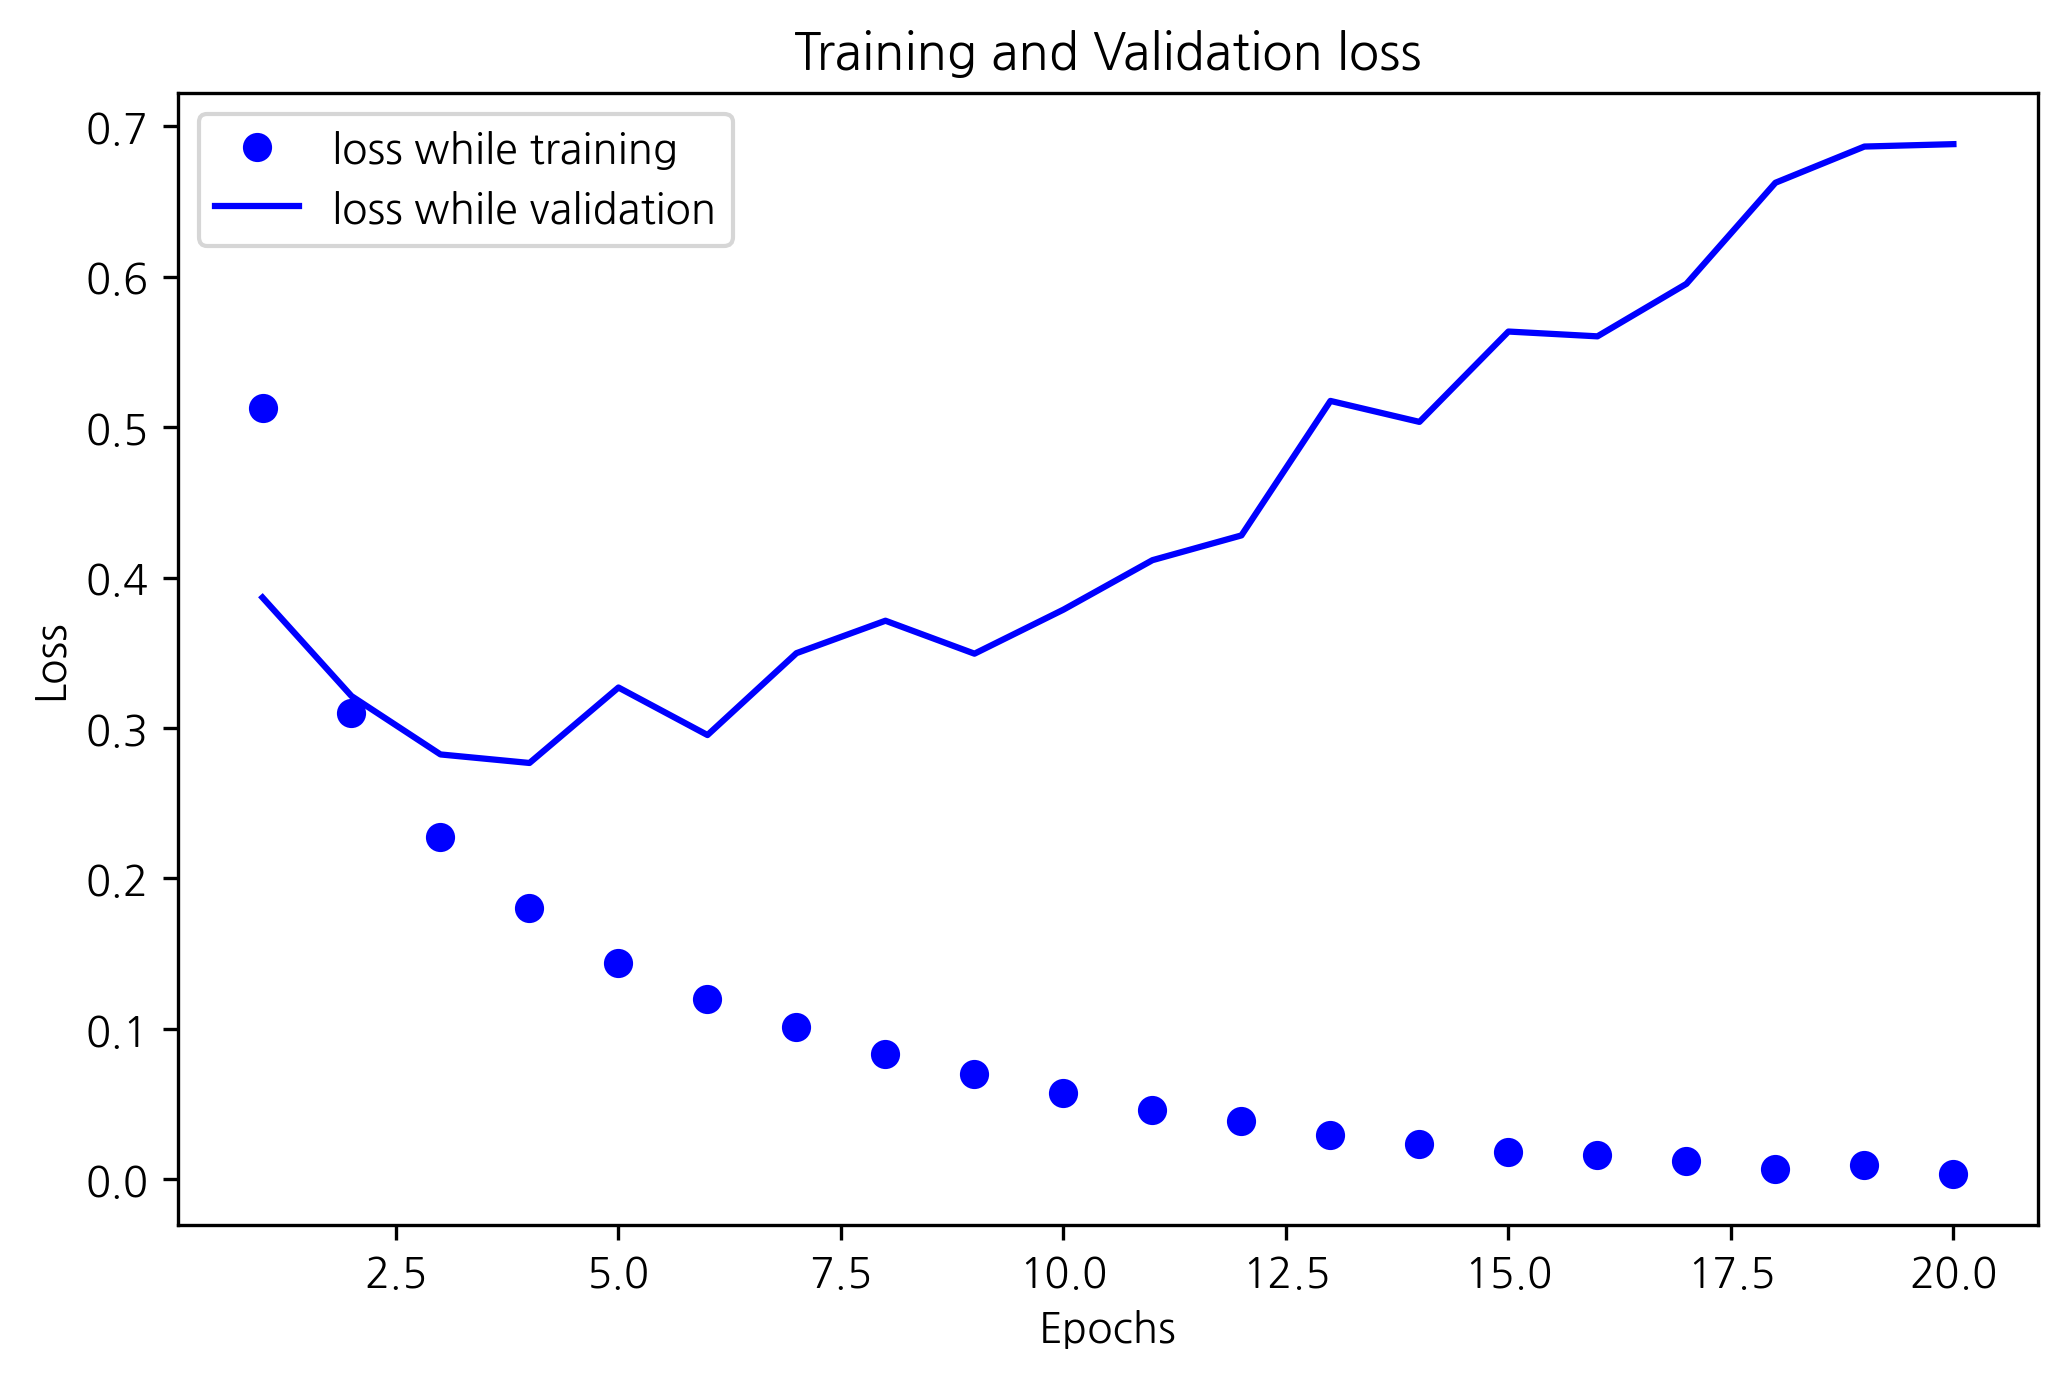

In [105]:
# 훈련, 검증 손실 그래프로 그리기 
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1) # 1~20

plt.plot(epochs, loss, 'bo', label='loss while training')
plt.plot(epochs, val_loss, 'b', label='loss while validation')
plt.title('Training and Validation loss')
plt.xlabel(f'Epochs')
plt.ylabel(f'Loss')
plt.legend()
plt.show()

# 결과 해석 및 추측 
## 과적합이 있는 것 같다. 훈련용 셋에서 예측손실은 지속 감소. 20번쯤 되면 극단적으로 줄어든다. 
## 하지만 테스트 셋에서는 손실이 점차 증가한다. 
## 훈련용 셋에 오버피팅 되어서 새 데이터를 제대로 예측하지 못하는 것 같다. 

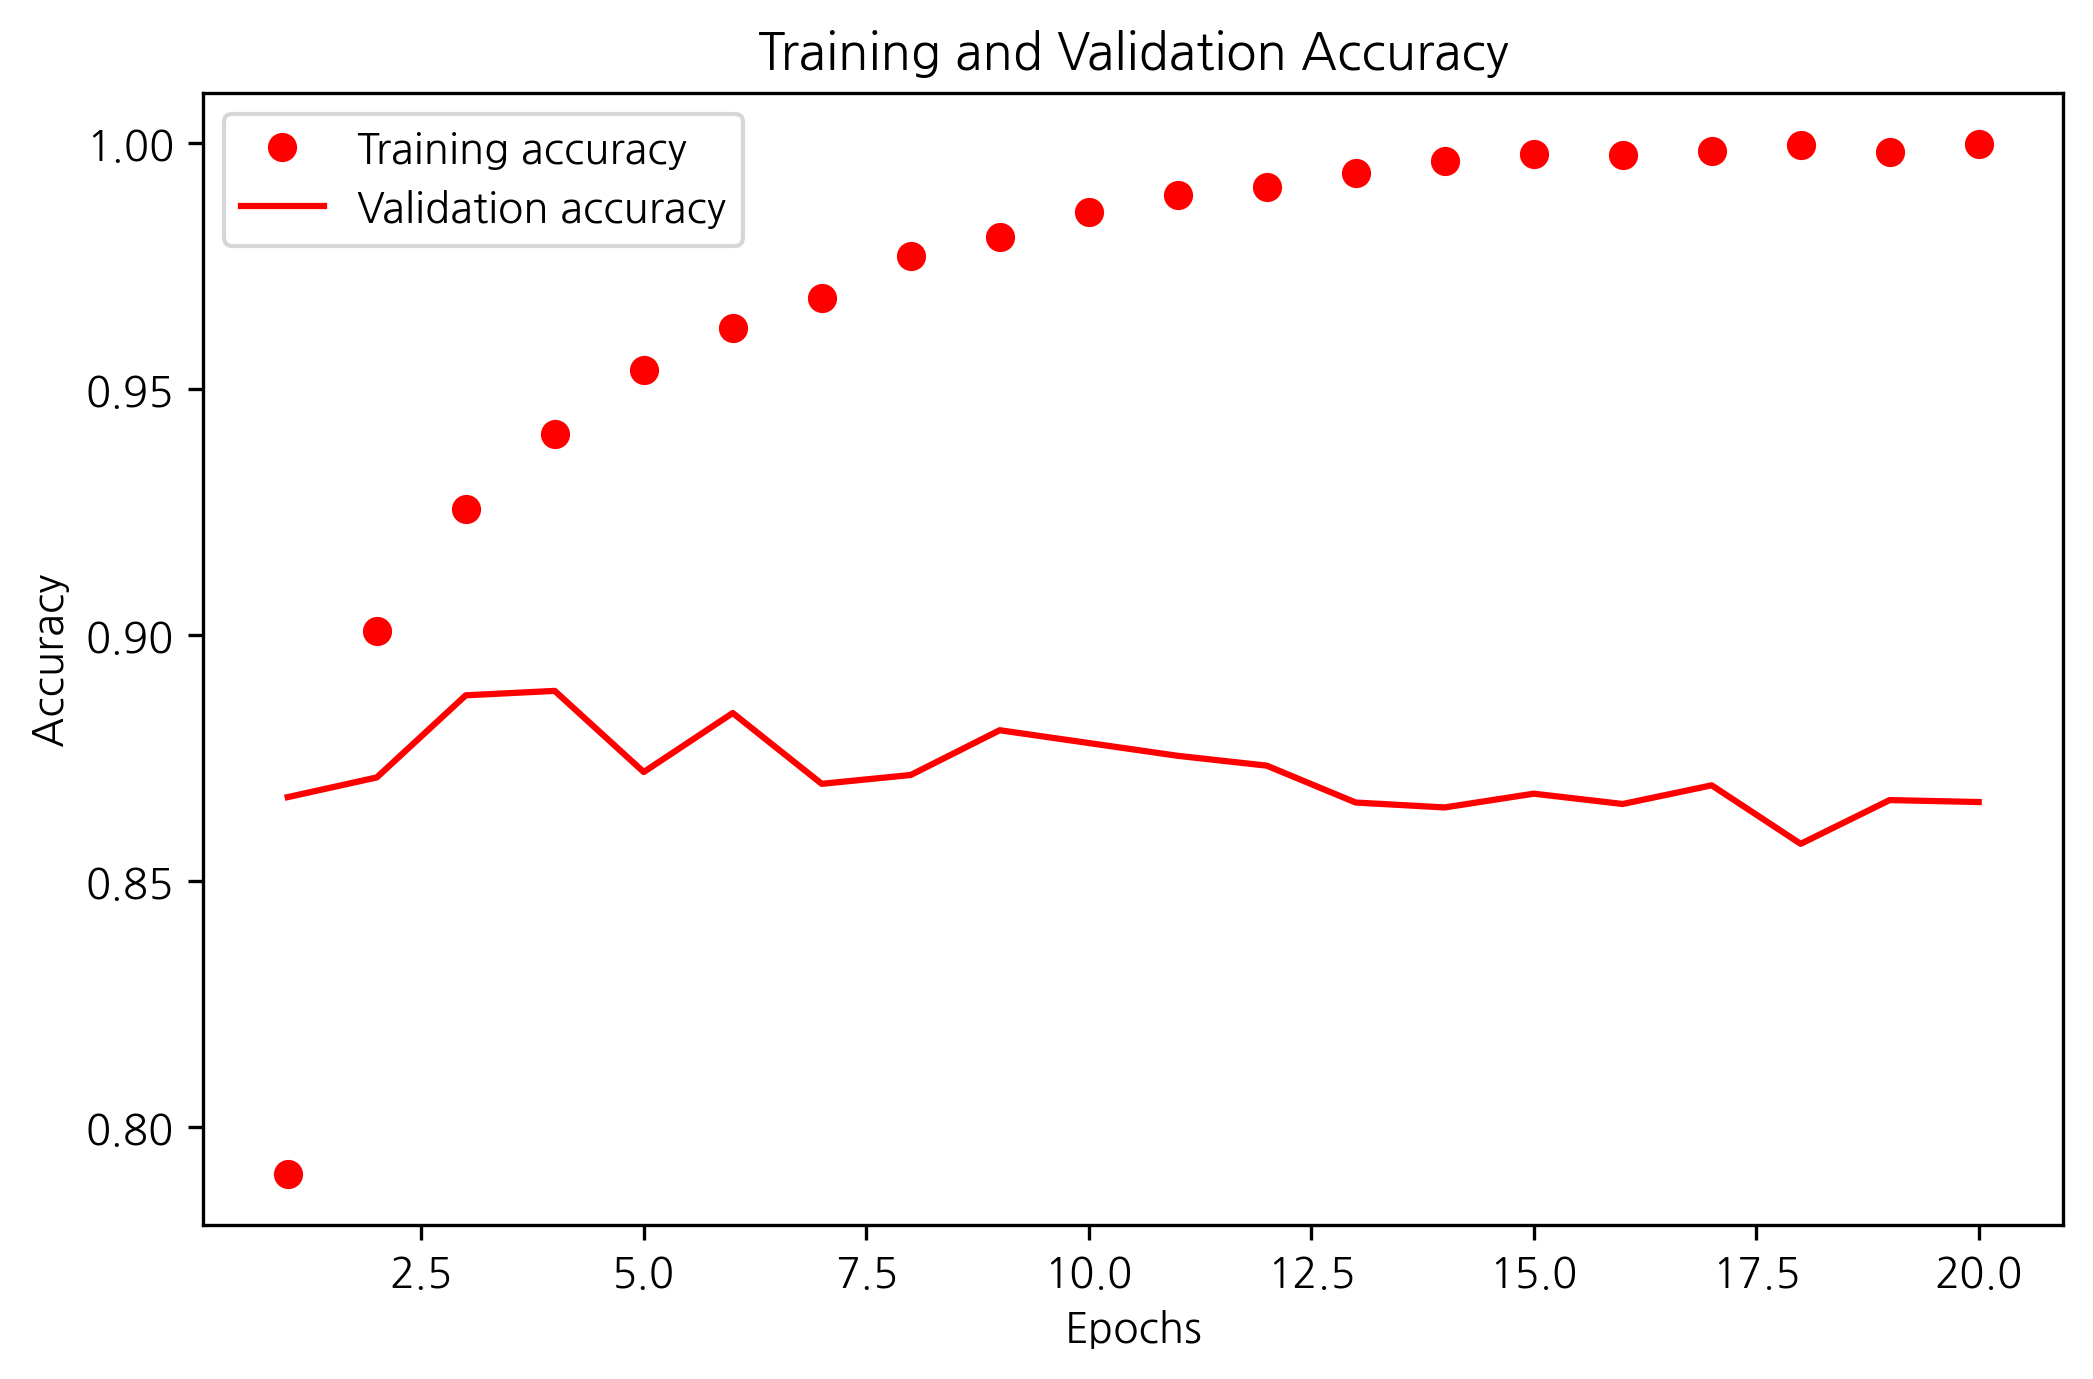

In [111]:
# 훈련, 검증 정확도 그래프로 그리기 
plt.clf() # 그래프 초기화 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(f'Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [113]:
# 20번 반복하면서 과적합 발생했다. 
# 4번만 반복해서 과적합을 완화해보자. 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 모델 훈련 시키기 - epoch:4번만
hd = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/4
 1/49 [..............................] - ETA: 15s - loss: 0.6984 - accuracy: 0.5020

2022-01-22 23:17:51.502860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/49 [===========================>..] - ETA: 0s - loss: 0.4579 - accuracy: 0.8226

2022-01-22 23:17:53.415123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 2s 43ms/step - loss: 0.4501 - accuracy: 0.8264 - val_loss: 0.3344 - val_accuracy: 0.8814
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2572 - accuracy: 0.9099 - val_loss: 0.3170 - val_accuracy: 0.8700
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1996 - accuracy: 0.9299 - val_loss: 0.2792 - val_accuracy: 0.8891
Epoch 4/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1670 - accuracy: 0.9404 - val_loss: 0.3064 - val_accuracy: 0.8777


In [115]:
pd.DataFrame(hd.history)

,loss,accuracy,val_loss,val_accuracy
0,0.450143,0.82644,0.334393,0.88136
1,0.257205,0.90992,0.317039,0.87000
2,0.199559,0.92988,0.279207,0.88908
3,0.167009,0.94044,0.306374,0.87772


In [116]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
 1/49 [..............................] - ETA: 15s - loss: 0.7006 - accuracy: 0.4824

2022-01-22 23:20:17.195949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 12ms/step - loss: 0.4453 - accuracy: 0.8300
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2561 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1966 - accuracy: 0.9293
Epoch 4/4
 17/782 [..............................] - ETA: 5s - loss: 0.2665 - accuracy: 0.8897

2022-01-22 23:20:20.625984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 5s 7ms/step - loss: 0.2950 - accuracy: 0.8840


In [117]:
result

[0.2950170338153839, 0.8840000629425049]

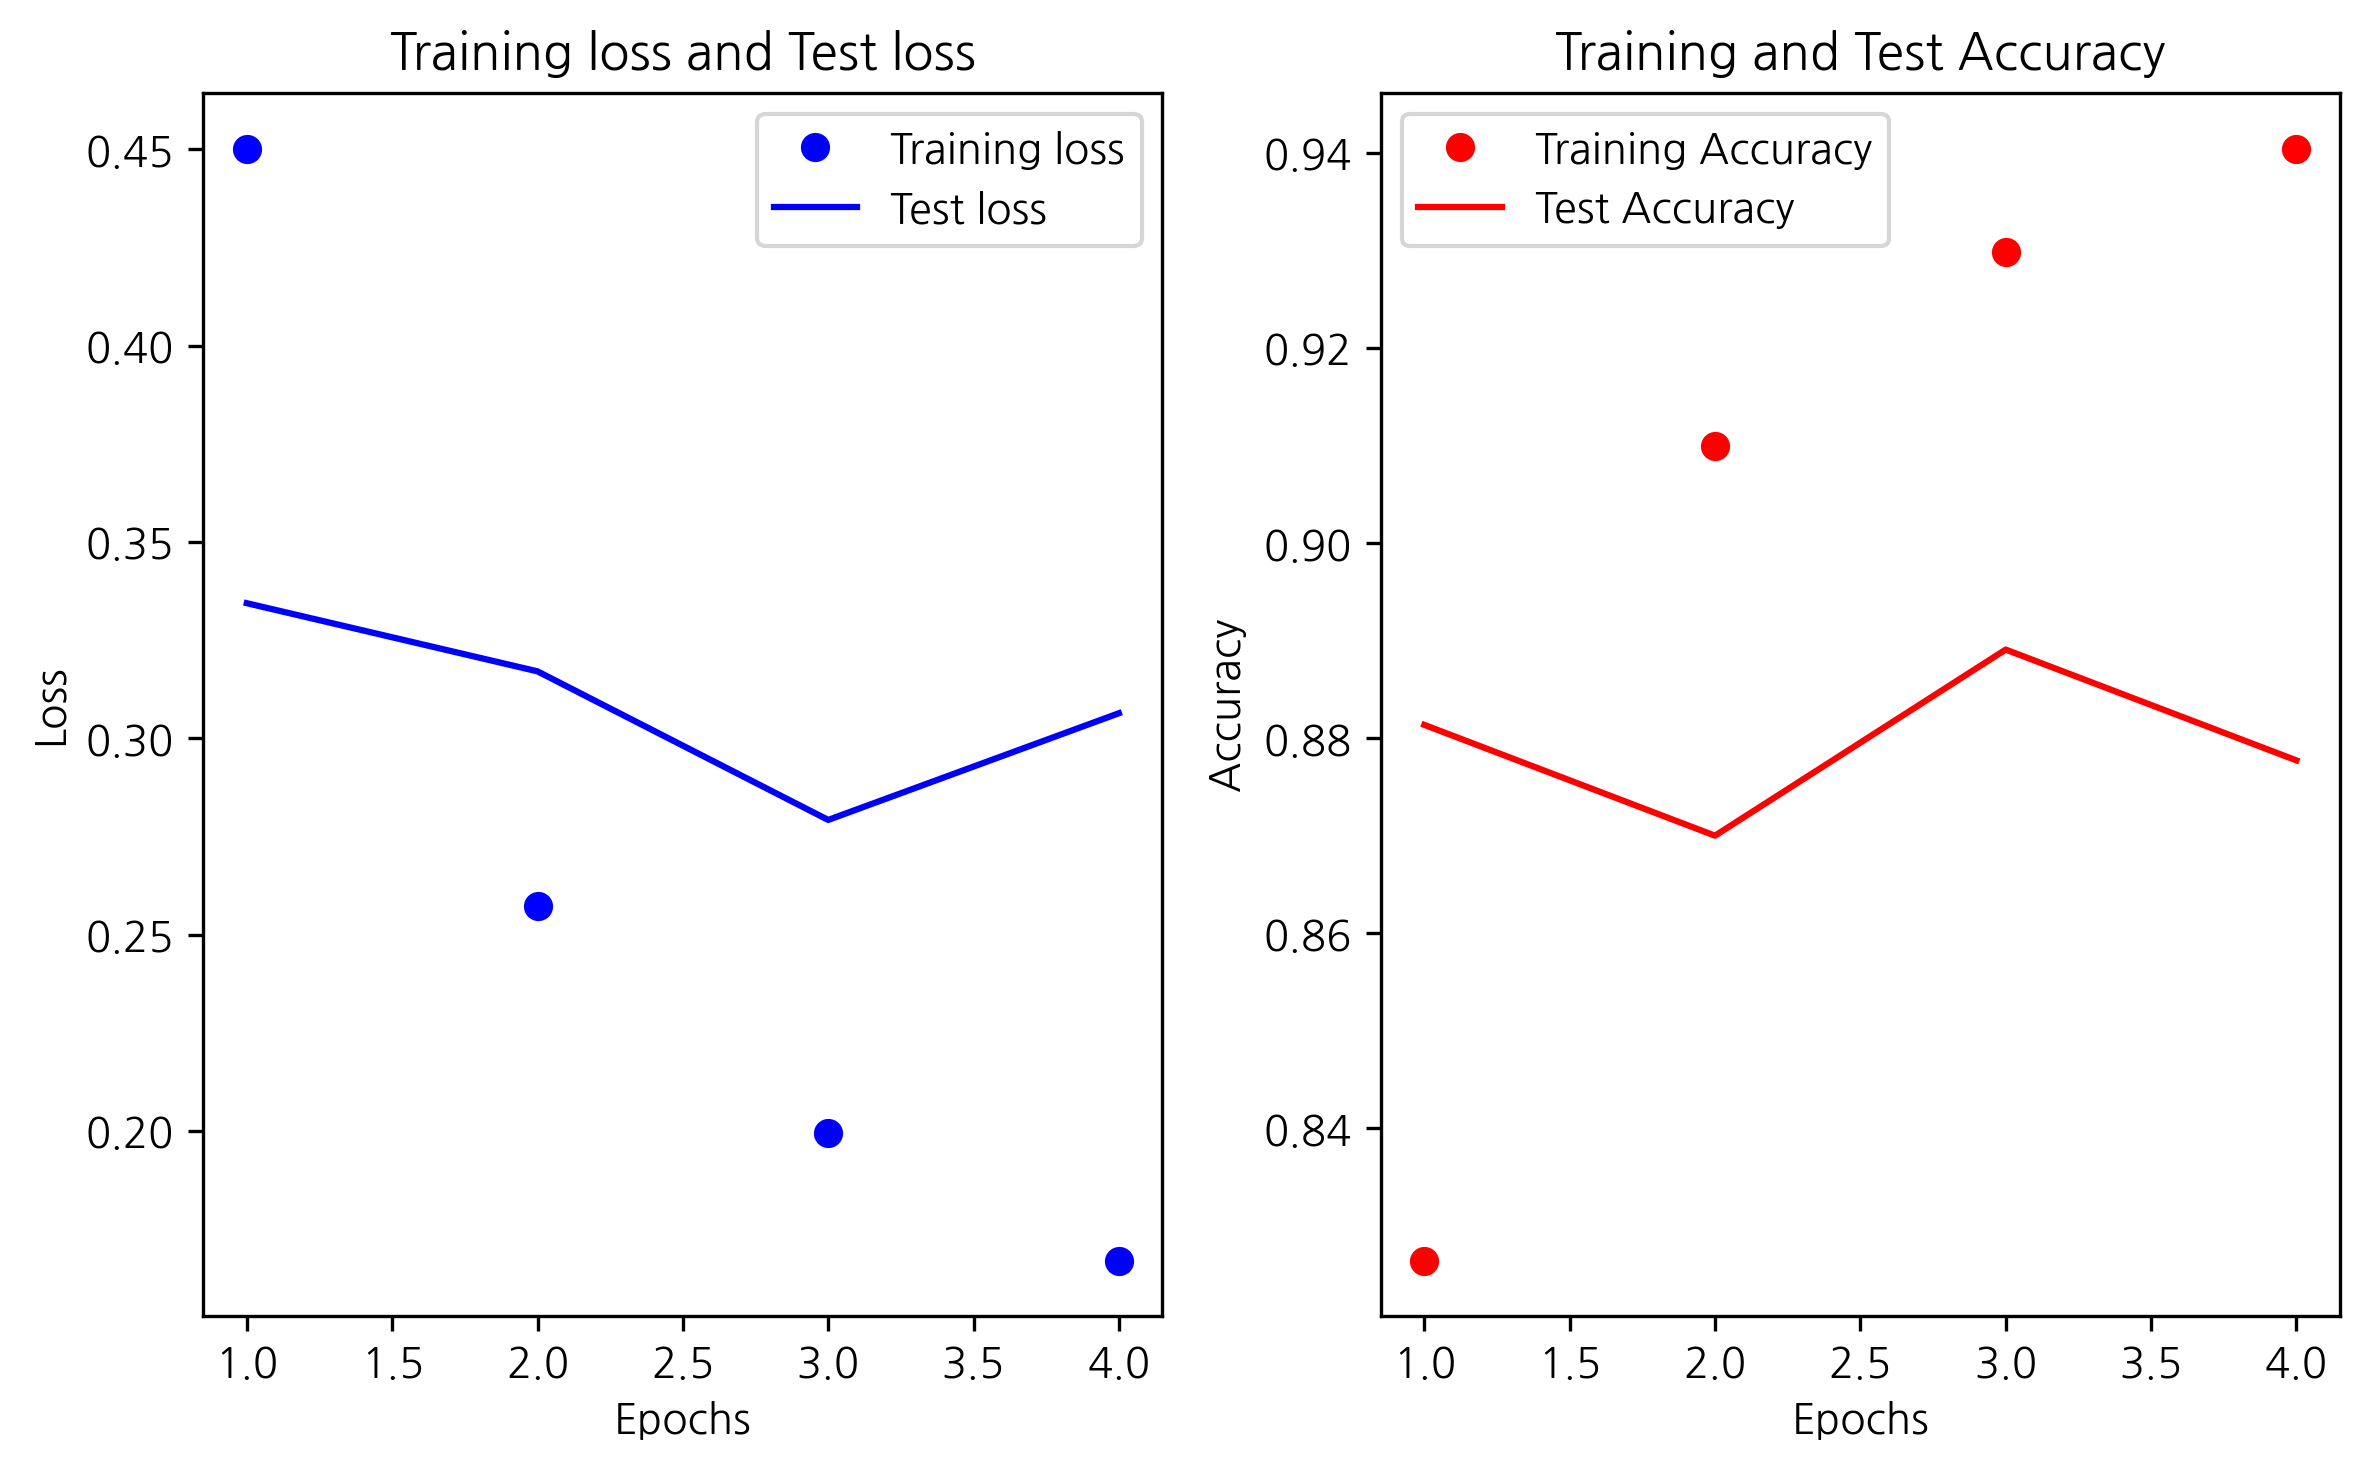

In [129]:
train_loss = hd.history['loss']
test_loss = hd.history['val_loss']

train_acc = hd.history['accuracy']
test_acc = hd.history['val_accuracy']

epochs = range(1, len(hd.history['accuracy'])+1)

plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training loss and Test loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'ro', label='Training Accuracy')
plt.plot(epochs, test_acc, 'r', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Training and Test Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [133]:
# 훈련된 모델이(가중치가) 새 데이터를 어떻게 분류하는 지 관찰하자. 
r = model.predict(x_test)

In [136]:
# 예측 결과 
r

array([[0.16957025],
       [0.9999465 ],
       [0.96045804],
       ...,
       [0.14915319],
       [0.1086537 ],
       [0.69666654]], dtype=float32)